In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm




In [2]:
N, D_in, D_out = 1000, 2, 1


# m =1
X2 = []
y2 = []
for j in range(N):
    X2.append([])
    #y.append([])
    for i in range(D_out):
        X2[-1].append( 1 )
        X2[-1].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
        y2.append( (X2[-1][-1]**2) / (2*X2[-1][-2])  )


X2 = torch.Tensor(X2)
y2 = torch.Tensor(y2)


# p =1
X3 = []
y3 = []
for j in range(N):
    X3.append([])
    #y.append([])
    for i in range(D_out):
        X3[-1].append( np.random.uniform(low=0.0, high=10.0, size=None) )
        X3[-1].append( 1 )
        y3.append( (X3[-1][-1]**2) / (2*X3[-1][-2])  )


X3 = torch.Tensor(X3)
y3 = torch.Tensor(y3)

# X2_test = torch.tensor(X2, dtype=torch.float32)
# y2_test = torch.tensor(y2, dtype=torch.float32).reshape(-1, 1)
# X3_test = torch.tensor(X3, dtype=torch.float32)
# y3_test = torch.tensor(y3, dtype=torch.float32).reshape(-1, 1)

In [3]:

X = torch.load('/content/drive/MyDrive/0_318lab/SCMP_ML/KEdataX_1000_1690897080.8460803.pt')
y = torch.load('/content/drive/MyDrive/0_318lab/SCMP_ML/KEdataY_1000_1690897080.8489494.pt')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=False)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.7, shuffle=True)
# X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
#X_train = torch.tensor(X_train, dtype=torch.float32)
#y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
#X_test = torch.tensor(X_test, dtype=torch.float32)
#y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)




In [ ]:
#default

"""
Bsize: 500 learningRate: 0.03 RMSE: 111.31 1000 loss: 515.4253401318177

"""
# for learningRate in range(10): #



for Bsize in [100]:
    # print('Bsize:', Bsize, end =' ')
    before_loss_twos =  torch.ones(Bsize, dtype=torch.float32)*2
    for learningRate in [ 5e-3  ]:
        # print('learningRate:', learningRate)
        # Define the model
        model = nn.Sequential(
            nn.Linear(2, 5),
            nn.LeakyReLU(),
            nn.Linear(5, 3),
            nn.LeakyReLU(),
            nn.Linear(3, 1)
            # nn.Linear(2, 3),
            # nn.LeakyReLU(),
            # nn.Linear(3, 2),
            # nn.LeakyReLU(),
            # nn.Linear(2, 1)
        )

        # loss function and optimizer
        loss_fn = nn.MSELoss()  # mean square error
        optimizer = optim.Adam(model.parameters(), lr=learningRate  )  # 10 loss: 5157042688.0

        n_epochs = 10000+1   # number of epochs to run
        batch_size = Bsize  # size of each batch
        batch_start = torch.arange(0, len(X_train), batch_size)

        # Hold the best model
        best_mse = np.inf   # init to infinity
        best_weights = None
        history = []
        history_train = []
        for epoch in range(n_epochs):
            model.train()
            before_loss_twos =  torch.ones(Bsize, dtype=torch.float32)*2
            with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
                bar.set_description(f"Epoch {epoch}")
                for start in bar:
                    # take a batch
                    X_batch = X_train[start:start+batch_size]
                    y_batch = y_train[start:start+batch_size]
                    # forward pass
                    y_pred = model(X_batch)

                    before_loss = y_pred/y_batch + y_batch/y_pred


                    loss = loss_fn(before_loss, before_loss_twos)
                    # backward pass
                    optimizer.zero_grad()
                    loss.backward()
                    # update weights
                    optimizer.step()
                    # print progress
                    bar.set_postfix(mse=float(loss))

            loss = float(loss)

            history_train.append(loss)
            # evaluate accuracy at end of each epoch
            model.eval()
            y_pred = model(X_test)

            before_loss = y_pred/y_test + y_test/y_pred
            before_loss_twos =  torch.ones(len(y_pred), dtype=torch.float32)*2
            mse = loss_fn(before_loss, before_loss_twos)

            mse = float(mse)

            history.append(mse)
            if mse < best_mse:
                best_mse = mse
                best_weights = copy.deepcopy(model.state_dict())

            if epoch % 100 == 0:
                print('epoch: %5d' % epoch, 'test_loss: %5d' % np.sqrt(mse), 'train_loss: %5d' % np.sqrt(loss))

        # restore model and return best accuracy
        model.load_state_dict(best_weights)
        # print("MSE: %.2f" % best_mse)
        # print("RMSE: %.2f" % np.sqrt(best_mse))
        print('n_of_data:',N, 'Bsize:', Bsize ,'learningRate:', learningRate , "minimum_RMSE: %.2f" % np.sqrt(best_mse), 'epoch:',epoch, 'test_loss:', np.sqrt(mse), 'train_loss:', np.sqrt(loss))
        # print(y_pred[:10])
        # print(y_test[:10])
        plt.plot(history)
        plt.yscale('log')
        plt.title('test_loss')
        plt.show()

        plt.plot(history_train)
        plt.title('train_loss')
        plt.yscale('log')
        plt.show()
print('all done')
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([300])) that is different to the input size (torch.Size([300, 300])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:     0 test_loss:  5886 train_loss:   736
epoch:   100 test_loss: 24933 train_loss:  1215
epoch:   200 test_loss: 25151 train_loss:  1205
epoch:   300 test_loss: 25472 train_loss:  1190
epoch:   400 test_loss: 26038 train_loss:  1171
epoch:   500 test_loss: 62043 train_loss:  1150
epoch:   600 test_loss: 42226 train_loss:  1117
epoch:   700 test_loss: 36708 train_loss:  1078
epoch:   800 test_loss: 32065 train_loss:  1031
epoch:   900 test_loss: 27656 train_loss:   961
epoch:  1000 test_loss: 33486 train_loss:   829
epoch:  1100 test_loss: 25829 train_loss:   672
epoch:  1200 test_loss: 18999 train_loss:   642
epoch:  1300 test_loss: 15190 train_loss:   624
epoch:  1400 test_loss: 11834 train_loss:   603
epoch:  1500 test_loss:  8547 train_loss:   581
epoch:  1600 test_loss:  6866 train_loss:   559
epoch:  1700 test_loss:  5723 train_loss:   536
epoch:  1800 test_loss: 11737 train_loss:   514
epoch:  1900 test_loss:  7131 train_loss:   498
epoch:  2000 test_loss: 12243 train_loss

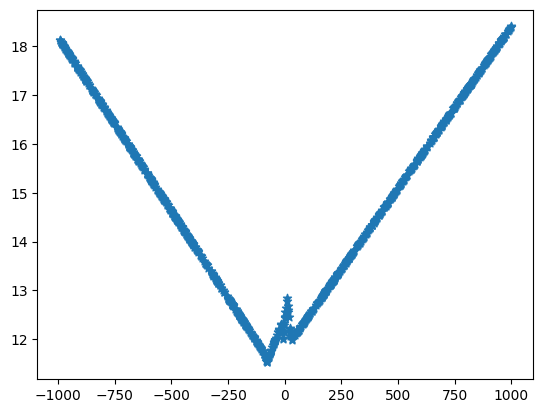

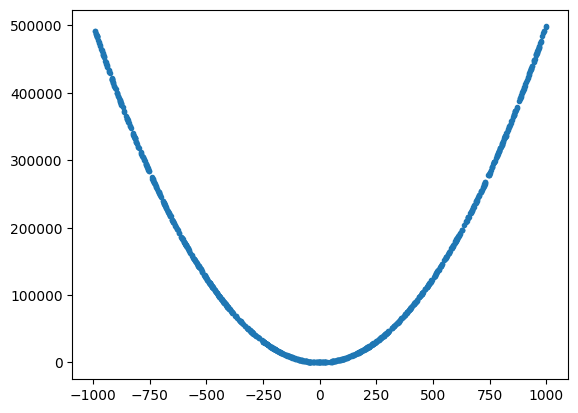

all done


In [6]:
model.eval()
y_pred = model(X2)
plt.scatter(X2[:,1].cpu().detach().numpy(),y_pred.cpu().detach().numpy(), marker='*')
# plt.scatter(X2[:,1],y_pred, marker='*')
plt.show()


plt.scatter(X2[:,1] ,y2, marker='.', )
plt.show()


print('all done')

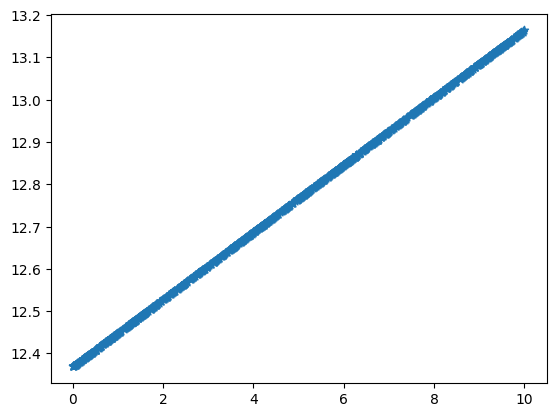

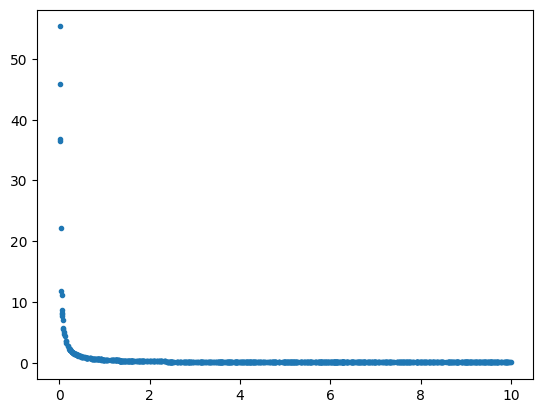

all done


In [7]:
model.eval()
y_pred = model(X3)
plt.scatter(X3[:,0].cpu().detach().numpy(),y_pred.cpu().detach().numpy(), marker='*')
# plt.scatter(X3[:,1],y_pred, marker='*')
plt.show()


plt.scatter(X3[:,0] ,y3, marker='.', )
plt.show()


print('all done')

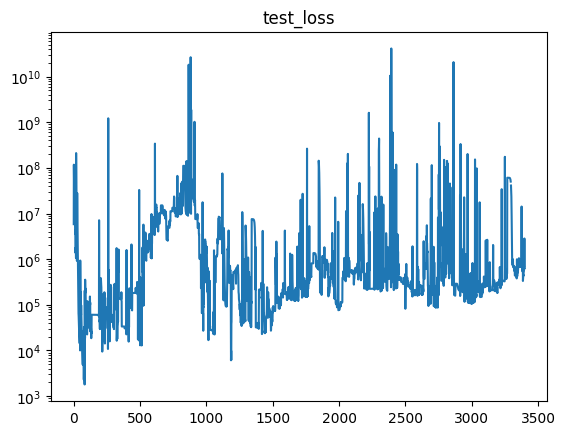

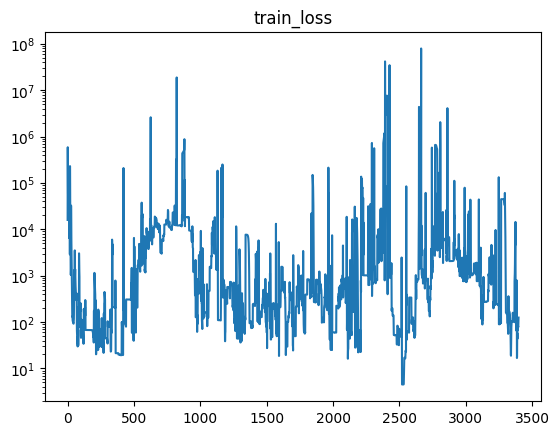

In [ ]:
plt.plot(history)
plt.yscale('log')
plt.title('test_loss')
plt.show()

plt.plot(history_train)
plt.title('train_loss')
plt.yscale('log')
plt.show()

In [ ]:
# when create new data

# N, D_in, H, D_out = 64, 1000, 100, 10
N, D_in, D_out = 100000, 2, 1

# 입력과 출력 위한 랜덤 텐서
X = []
y = []
for j in range(N):
    X.append([])
    #y.append([])
    for i in range(D_out):
        X[-1].append( np.random.uniform(low=0.0, high=1000.0, size=None) )
        X[-1].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
        y.append( (X[-1][-1]**2) / (2*X[-1][-2])  )


X = torch.Tensor(X)
y = torch.Tensor(y)

# nn package를 이용하여 여러 층으로 정의된 모델 생성
# nn.Sequential은 다른 모듈을 담을 수 있는 모듈이며 담겨진 모듈은 순서대로 연결
# Linear 모듈은 곧 Affine 모듈

# Read data
# data = fetch_california_housing()
# X, y = data.data, data.target

# train-test split for model evaluation

import time
# >>> # Save to file
# >>> x = torch.tensor([0, 1, 2, 3, 4])
# >>> torch.save(x, 'tensor.pt')

torch.save(X, 'KEdataX_'+str(time.time())+'.pt' )
torch.save(y, 'KEdataY_'+str(time.time())+'.pt' )
